## 머신러닝

데이터 : 객실 사용 여부 관련 데이터

#### 1. 데이터를 탐색하고 탐색 결과를 제시하시오.

In [179]:
import pandas as pd
import numpy as np

hotel = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/hotel_bookings.csv')
hotel.head()

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90


In [180]:
hotel.isnull().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [181]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [182]:
hotel.deposit_type.value_counts()

deposit_type
No Deposit    19138
Non Refund      834
Refundable       28
Name: count, dtype: int64

In [183]:
hotel.is_canceled.value_counts()

is_canceled
0    17600
1     2400
Name: count, dtype: int64

+ 종속변수 is_canceled 는 0,1 값을 갖는 범주형 변수
+ 독립변수는 deposit_type 만 object 형식이고 나머지는 int 나 float 의 수치형 연속형 변수
+ 결측치는 lead_time, is_repeated_guest, adr 에 각각 5, 368, 1063 개의 결측치가 존재한다. 결측치의 비율에 따라 각각 다른 결측치 대체 방식을 사용할 수 있을 것으로 보인다.

+ 종속변수에 따른 독립변수의 분포를 알아보자.

In [184]:
group_df = hotel.drop(['deposit_type'], axis = 1).groupby('is_canceled').mean()
group_df

,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
is_canceled,,,,,,,,,
0,78.420290,0.888750,2.361080,0.041481,0.013068,0.189886,0.293409,1.737443,101.034845
1,141.388333,0.920417,2.522083,0.013577,0.178333,0.016250,0.093333,3.791667,104.162354


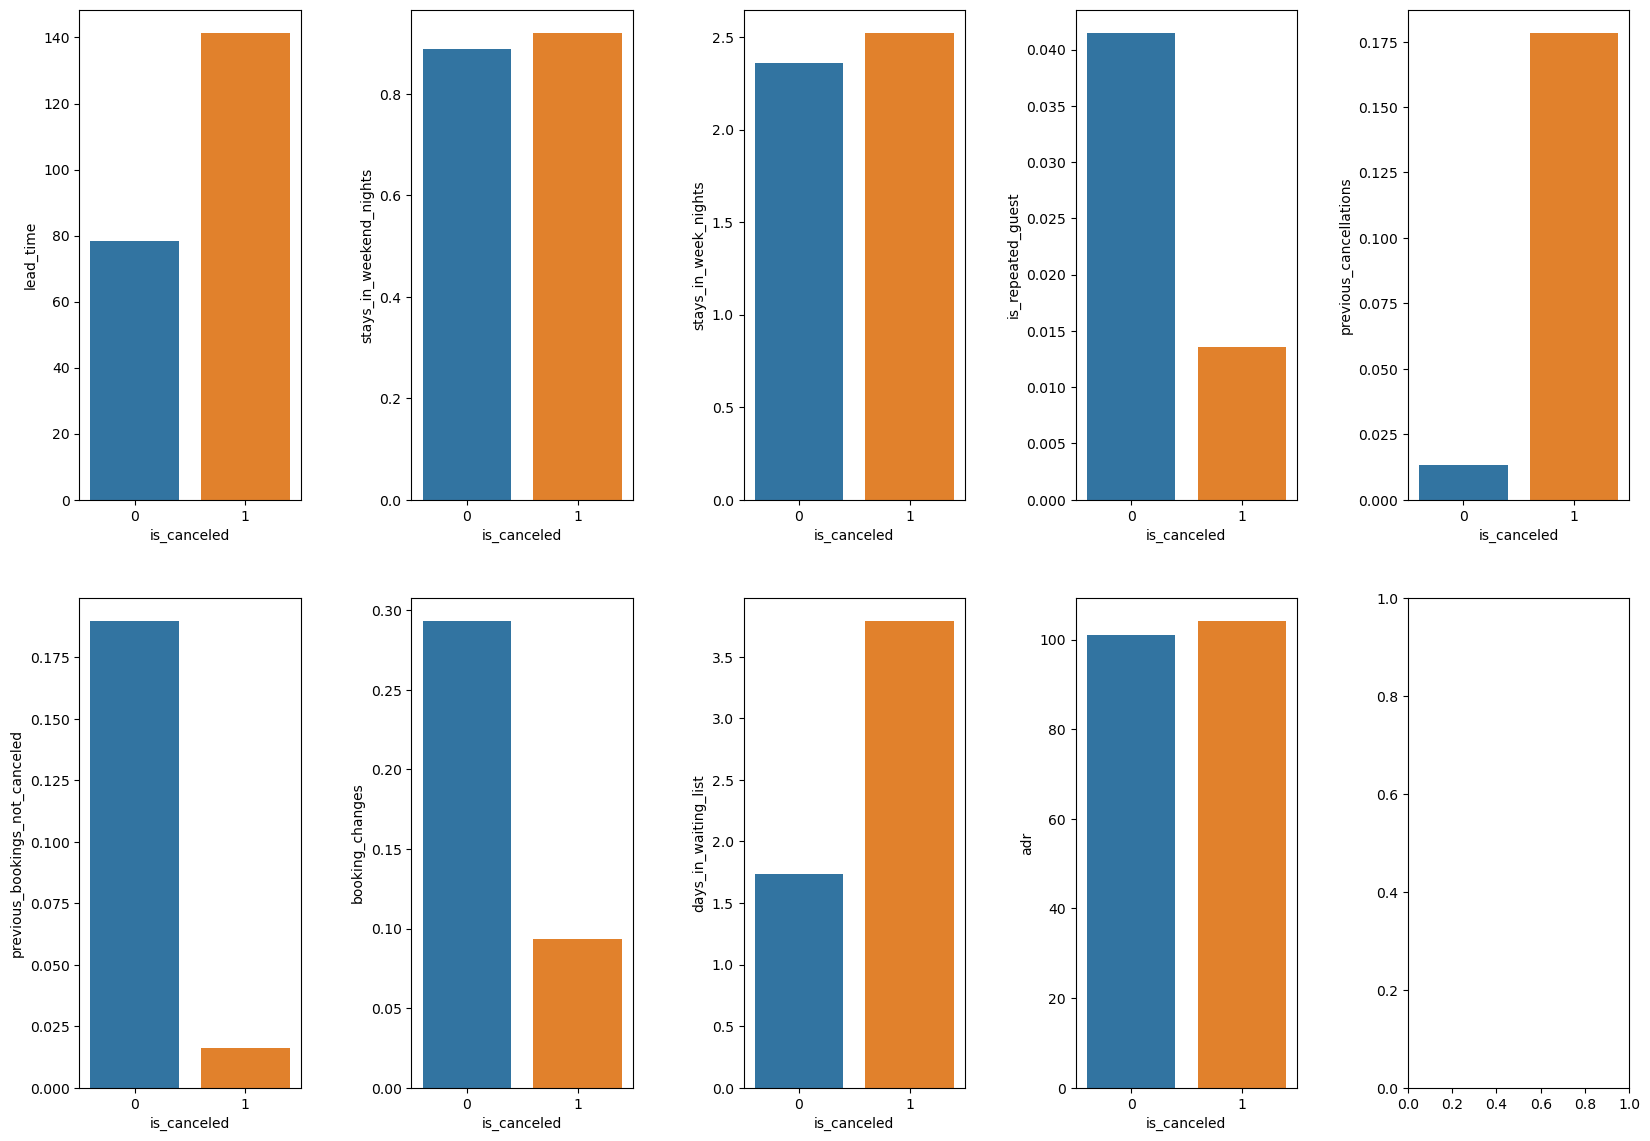

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2,5, figsize = (20, 14))
plt.subplots_adjust(wspace=0.5)
for i in range(9):
    sns.barplot(x = group_df.index, y = group_df.iloc[:, i], ax = axes[i // 5][i % 5])

    

In [186]:
hotel[hotel.is_canceled == 0].deposit_type.value_counts()

deposit_type
No Deposit    17552
Refundable       28
Non Refund       20
Name: count, dtype: int64

In [187]:
hotel[hotel.is_canceled == 1].deposit_type.value_counts()

deposit_type
No Deposit    1586
Non Refund     814
Name: count, dtype: int64

종속변수에 대한 독립변수의 분포를 살펴보았을 때 크게 눈에 띄는 것은 다음과 같다.
+ lead_time, previous_cancellations, day_in_waiting_list 변수에서 is_canceled == 1 인 경우의 분포가 훨씬 크다. 
+ is_repeated_guest, previous_bookings_not_canceled, booking_changes 변수에서는 is_canceled == 0 인 경우의 분포가 훨씬 크다.

#### 2. 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

결측치가 있는 변수는 lead_time, is_repeated_guest, adr 이다.

In [188]:
hotel.head()

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90


In [189]:
hotel.isnull().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [190]:
hotel[['lead_time', 'is_repeated_guest', 'adr']].isnull().sum() / len(hotel) * 100

lead_time            0.025
is_repeated_guest    1.790
adr                  5.315
dtype: float64

+ 변수별 결측치 비율은 lead_time, is_repeated_guest, adr 각각 0.025%, 1,8%, 5.3% 이다.
+ lead_time 의 경우 결측치가 매우 적기 때문에 평균으로 대치한다.
+ is_repeated_guest 의 경우는 최빈값으로 대체한다.
+ adr 변수의 결측치는 deposit_type 별 평균으로 대체한다.

In [191]:
hotel['lead_time'] = hotel['lead_time'].fillna(hotel['lead_time'].mean())
# hotel['is_repeated_guest'].value_counts()
hotel['is_repeated_guest'] = hotel['is_repeated_guest'].fillna(0.0)

In [192]:
index1 = hotel[(hotel['deposit_type'] == 'No Deposit' ) & (hotel['adr'].isna() == True)].index
index2 = hotel[(hotel['deposit_type'] == 'Refundable' ) & (hotel['adr'].isna() == True)].index
index3 = hotel[(hotel['deposit_type'] == 'Non Refund' ) & (hotel['adr'].isna() == True)].index

value1 = hotel[hotel.deposit_type == 'No Deposit']['adr'].mean()
value2 = hotel[hotel.deposit_type == 'Refundable']['adr'].mean()
value3 = hotel[hotel.deposit_type == 'Non Refund']['adr'].mean()

In [193]:
hotel.loc[index1, 'adr'] = value1
hotel.loc[index2, 'adr'] = value2
hotel.loc[index3, 'adr'] = value3

In [194]:
hotel.isnull().sum()

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

#### 3. 데이터 질을 향상시킬 수 있는 방법을 제안하시오.

<Axes: ylabel='lead_time'>

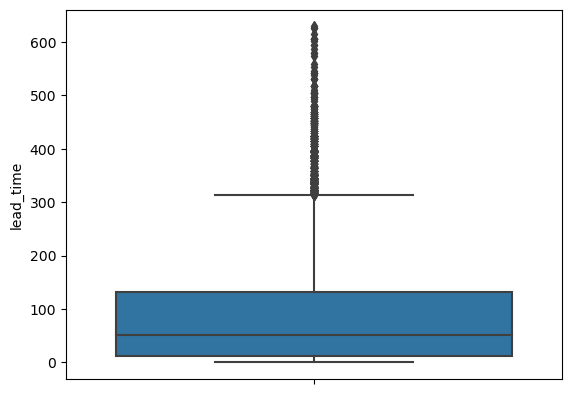

In [195]:
sns.boxplot(y = hotel.lead_time)

+ lead_time 변수의 boxplot을 그려보면 이상치가 존재하는 것을 알 수 있다. 이를 IQR 방식으로 보정해주면 데이터의 질이 올라갈 수 있다.
+ is_repeated_guest 의 비율이 너무 차이가 심하므로 1인 경우의 데이터를 추가하는 방법

In [196]:
hotel.is_repeated_guest.value_counts()

is_repeated_guest
0.0    19251
1.0      749
Name: count, dtype: int64

#### 4. 데이터 불균형을 시각화하여 식별하고 불균형 판단 근거를 작성하시오.

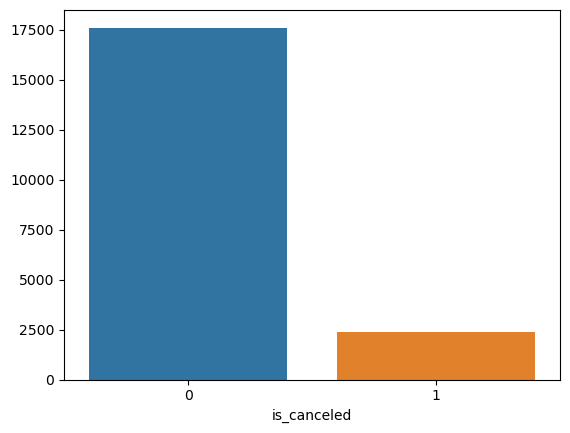

is_canceled
0    0.88
1    0.12
Name: count, dtype: float64


In [197]:
sns.barplot(x = hotel.is_canceled.value_counts().index, y = hotel.is_canceled.value_counts().values)
plt.show()

print(hotel.is_canceled.value_counts() / hotel.is_canceled.value_counts().sum())

+ 종속변수인 is_canceled 는 0과 1로 구성된 데이터이다. 0인 비율이 88%, 1인 비율이 12%로 데이터가 매우 불균형하다고 할 수 있다.

#### 5. 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.

+ 오버 샘플링 기법은 비중이 낮은 데이터를 추가로 생성하여 데이터 불균형을 해결하는 방식이다. 언더 샘플링은 데이터의 손실 문제로 예측 성능이 저하되는 단점이 있으므로 일반적으로 오버샘플링 기법을 사용한다.

Random Oversampling
+ 소수 클래스에 속하는 데이터의 관측치를 단순 복사하는 방식으로 데이터를 증식한다.
+ 소수 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만, 사용 방법이 간단하다는 장점이 있다.

SMOTE
+ 적은 데이터 세트에 있는 개별 데이터들의 k-최근접 이웃을 찾아 해당 데이터와 k 개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다.
+ Resampling 방식보다 속도가 느리다는 단점이 있지만 단순 복사방식이 아니므로 과적합 문제를 예방할 수 있다는 장점이 있다.

#### 6. 기법을 선정한 이유를 작성하고, 원 데이터를 포함해 3개의 데이터 세트를 구성하시오.

Random Oversampling 과 SMOTE 방식은 선택한다. 그 이유로는 Random Oversampling 은 간단한 방식으로 데이터 불균형 문제를 해결할 수 있기 때문이고, SMOTE 방식은 데이터 과적합 문제를 해결할 수 있기 때문이다.

In [198]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
hotel = pd.get_dummies(hotel, columns= ['deposit_type'], drop_first= True)

In [207]:
X = hotel.drop(['is_canceled'], axis = 1)
y = hotel['is_canceled']

X_ra, y_ra = RandomOverSampler(random_state= 42).fit_resample(X, y)
X_sm, y_sm = SMOTE(k_neighbors= 3 ,random_state= 42).fit_resample(X, y)

#### 7. 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

+ 정확도 측면으로는 SMOTE, 속도 측면의 모델은 RandomOversampler 을 사용하자.
+ RandomOversampler 은 단순 복사이므로 속도가 SMOTE 에 비해 빠르고 SMOTE 는 k 최근접 이웃 알고리즘을 이용하기 때문에 속도는 resampling 에 비해 느리지만 더 정확하다.
+ 이 데이터 세트는 크기가 작아 RandomOverSampler 의 정확도가 더 크게 나왔지만 데이터가 더 커진다면 SMOTE가 더 좋은 성능을 띌 가능성이 높다.

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
X_ra_train, X_ra_test, y_ra_train, y_ra_test = train_test_split(X_ra, y_ra, test_size= 0.3, random_state= 42)
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size= 0.3, random_state= 42)

rf_clf = RandomForestClassifier()

start = time.time()
rf_clf.fit(X_train, y_train)
end = time.time()

y_pred = rf_clf.predict(X_test)

print('[original datasets]')
print('time :', end - start)
print('accuracy :', rf_clf.score(X_train,  y_train))

rf_clf = RandomForestClassifier()

start = time.time()
rf_clf.fit(X_ra_train, y_ra_train)
end = time.time()

y_pred = rf_clf.predict(X_ra_test)

print('[random oversampling datasets]')
print('time :', end - start)
print('accuracy :', rf_clf.score(X_ra_train,  y_ra_train))

rf_clf = RandomForestClassifier()

start = time.time()
rf_clf.fit(X_sm_train, y_sm_train)
end = time.time()

y_pred = rf_clf.predict(X_sm_test)

print('[SMOTE datasets]')
print('time :', end - start)
print('accuracy :', rf_clf.score(X_sm_train,  y_sm_train))

[original datasets]
time : 1.073784589767456
accuracy : 0.9953571428571428
[random oversampling datasets]
time : 1.655881643295288
accuracy : 0.9924512987012987
[SMOTE datasets]
time : 2.0627546310424805
accuracy : 0.996185064935065


#### 8. 원 데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

In [211]:
rf_clf = RandomForestClassifier()

start = time.time()
rf_clf.fit(X_train, y_train)
end = time.time()

y_pred = rf_clf.predict(X_test)

print('[original datasets]')
print('time :', end - start)
print('accuracy :', rf_clf.score(X_test,  y_test))

rf_clf = RandomForestClassifier()

start = time.time()
rf_clf.fit(X_ra_train, y_ra_train)
end = time.time()

y_pred = rf_clf.predict(X_ra_test)

print('[random oversampling datasets]')
print('time :', end - start)
print('accuracy :', rf_clf.score(X_ra_test,  y_ra_test))

rf_clf = RandomForestClassifier()

start = time.time()
rf_clf.fit(X_sm_train, y_sm_train)
end = time.time()

y_pred = rf_clf.predict(X_sm_test)

print('[SMOTE datasets]')
print('time :', end - start)
print('accuracy :', rf_clf.score(X_sm_test,  y_sm_test))

[original datasets]
time : 1.151176929473877
accuracy : 0.9225
[random oversampling datasets]
time : 1.6487255096435547
accuracy : 0.9654356060606061
[SMOTE datasets]
time : 2.036102771759033
accuracy : 0.9067234848484849


원본 데이터를 RandomForestClassifier 로 분류하였을 때 train 의 정확도는 99% 정도였으나 test 셋의 정확도는 92%로 훈련모델이 과적합 되어있었다.  
오버샘플링은 데이터의 과적합을 방지하는 효과가 있는데 RandomOverSampler 을 사용한 모델은 test 셋의 정확도가 96.5% 로 과적합 문제를 조금은 해결했다고 할 수 있다.

## 통계분석

데이터 : 각 문항 참고

### 1번
공장에서는 시제품의 농도(%) 60이라고 주장하며 품질 관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오

데이터 : (시제품 샘플 농도) 52, 50, 62, 75, 26, 45, 62, 35, 57, 14

#### 1-1 연구가설, 귀무가설을 작성하시오.

+ H0 : 시제품의 농도가 60이다.
+ H1 : 시제품의 농도가 60이 아니다.

#### 1-2 유효한 샘플의 수를 계산하시오.

데이터가 정규분포를 띄는지 확인하자.

In [ ]:
x = [52, 50, 62, 75, 26, 45, 62, 35, 57, 14]

from scipy.stats import shapiro
# H0 : 정규성을 만족한다.
# H1 : 정규성을 만족하지 않는다.

shapiro(x)

+ 정규성 검정에서 p 값이 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 정규성을 만족한다.

+ 오차한계를 5라고 했을 때 샘플의 표준편차를 구하자.

In [212]:
x = [52, 50, 62, 75, 26, 45, 62, 35, 57, 14]

moe = 5
a = 0.05
std = np.std(x)
print(std)

17.434448657758008


In [217]:
from scipy import stats
(stats.t.ppf(q = 0.05, df = 9)*std/5) ** 2

40.85590828532381

+ 유요한 샘플은 40 이상이다.

#### 1-3 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

+ 데이터가 정규성을 만족하므로 ttest_1samp 을 사용한다.

In [220]:
from scipy.stats import ttest_1samp
ttest_1samp(x, popmean = 60)

TtestResult(statistic=-2.0992920807801787, pvalue=0.06519313277276138, df=9)

t 검정에서 p-value 가 0.05보다 크므로 귀무가설을 기각하지 않는다. 즉 시제품의 농도는 60이라고 할 수 있다.

### 2번
코로나 시계열 데이터로 다음을 수행하시오.

데이터 : 지역별 코로나 확진자 수 시계열 데이터

#### 2-1 ACF 사용해서 distancd 를 계산하시오.

In [31]:
import pandas as pd
import numpy as np
from urllib.parse import quote 
# query = quote('서울특별시코로나19.csv')
covid = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EC%BD%94%EB%A1%9C%EB%82%9819.csv')

covid1 = covid.drop(['날짜'], axis= 1)

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,37261,33753,55376,81018,96008,95433,103288,116862,75118,82254,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,36216,32835,53872,79030,93474,92993,100255,113609,72934,79677,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,35276,31878,52391,76802,91030,90277,97419,110583,70754,77878,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,34879,31577,51652,76108,89876,89302,96359,109500,70003,76542,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,34061,30903,50720,74178,87770,87345,93690,106437,68329,75119,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,3,0,0,0,0,0,1,2,0,0,...,1,0,0,0,0,0,0,0,1,0


sm.tsa.stattools.acf 를 사용해 ACF distance 를 계산한다. 이때 n_lag 는 데이터의 관측 개수를 고려하여 785로 한다.

In [32]:
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags = n_lags)

n_lags = 785
lag_arr = np.repeat(n_lags, covid1.shape[1])
acf_list = list(map(acf, covid1.transpose().to_numpy(), lag_arr))
acf_df = pd.DataFrame(acf_list).transpose()
acf_df.columns = covid1.columns

acf_df

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965624,0.966025,0.965807,0.964843,0.965118,0.966179,0.964429,0.964386,0.964873,0.964677,...,0.963102,0.964896,0.964495,0.964211,0.964682,0.964599,0.964920,0.965594,0.965216,0.964788
2,0.932172,0.932933,0.932148,0.930035,0.930705,0.932781,0.929547,0.929349,0.930425,0.930168,...,0.927079,0.930870,0.929726,0.929708,0.930160,0.930349,0.931073,0.931913,0.930854,0.930000
3,0.899077,0.900435,0.899075,0.895739,0.896734,0.900063,0.895251,0.894822,0.896665,0.895849,...,0.891603,0.897198,0.895662,0.895164,0.895834,0.896316,0.897017,0.898790,0.897147,0.895648
4,0.865542,0.867391,0.865682,0.860691,0.862274,0.866781,0.860302,0.859554,0.862291,0.861332,...,0.855502,0.862796,0.860914,0.860051,0.860964,0.861660,0.863028,0.865697,0.862857,0.861294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,-0.017175,-0.017212,-0.017232,-0.015171,-0.015231,-0.016054,-0.016019,-0.015739,-0.015857,-0.015638,...,-0.015340,-0.016170,-0.015477,-0.016447,-0.016157,-0.016273,-0.016151,-0.016955,-0.015392,-0.015228
781,-0.013889,-0.013915,-0.013929,-0.012270,-0.012320,-0.012982,-0.012970,-0.012738,-0.012831,-0.012644,...,-0.012420,-0.013083,-0.012523,-0.013303,-0.013069,-0.013163,-0.013059,-0.013717,-0.012449,-0.012334
782,-0.010519,-0.010542,-0.010562,-0.009290,-0.009335,-0.009836,-0.009829,-0.009646,-0.009726,-0.009589,...,-0.009417,-0.009909,-0.009490,-0.010075,-0.009899,-0.009972,-0.009907,-0.010415,-0.009434,-0.009360
783,-0.007108,-0.007135,-0.007144,-0.006282,-0.006309,-0.006655,-0.006652,-0.006522,-0.006586,-0.006479,...,-0.006374,-0.006704,-0.006427,-0.006808,-0.006687,-0.006742,-0.006686,-0.007044,-0.006380,-0.006323


#### 2-2 계층적 군집 분석을 위해 덴드로그램을 작성하시오.

In [40]:
acf_df = acf_df.T
acf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
종로구,1.0,0.965624,0.932172,0.899077,0.865542,0.832363,0.794512,0.761958,0.729971,0.699409,...,-0.032352,-0.029599,-0.026741,-0.023738,-0.020635,-0.017175,-0.013889,-0.010519,-0.007108,-0.003608
중구,1.0,0.966025,0.932933,0.900435,0.867391,0.834610,0.796898,0.764614,0.733020,0.702617,...,-0.032460,-0.029706,-0.026830,-0.023818,-0.020699,-0.017212,-0.013915,-0.010542,-0.007135,-0.003619
용산구,1.0,0.965807,0.932148,0.899075,0.865682,0.832234,0.798381,0.765454,0.733336,0.702647,...,-0.032290,-0.029516,-0.026637,-0.023616,-0.020484,-0.017232,-0.013929,-0.010562,-0.007144,-0.003624
성동구,1.0,0.964843,0.930035,0.895739,0.860691,0.826010,0.789577,0.755252,0.721447,0.689063,...,-0.028496,-0.026046,-0.023505,-0.020839,-0.018086,-0.015171,-0.012270,-0.009290,-0.006282,-0.003182
광진구,1.0,0.965118,0.930705,0.896734,0.862274,0.828063,0.793461,0.759914,0.727410,0.696133,...,-0.028500,-0.026029,-0.023499,-0.020853,-0.018098,-0.015231,-0.012320,-0.009335,-0.006309,-0.003199


+ 위 acf_df 데이터로 계층적 군집분석을 실시한다.

In [54]:
# plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

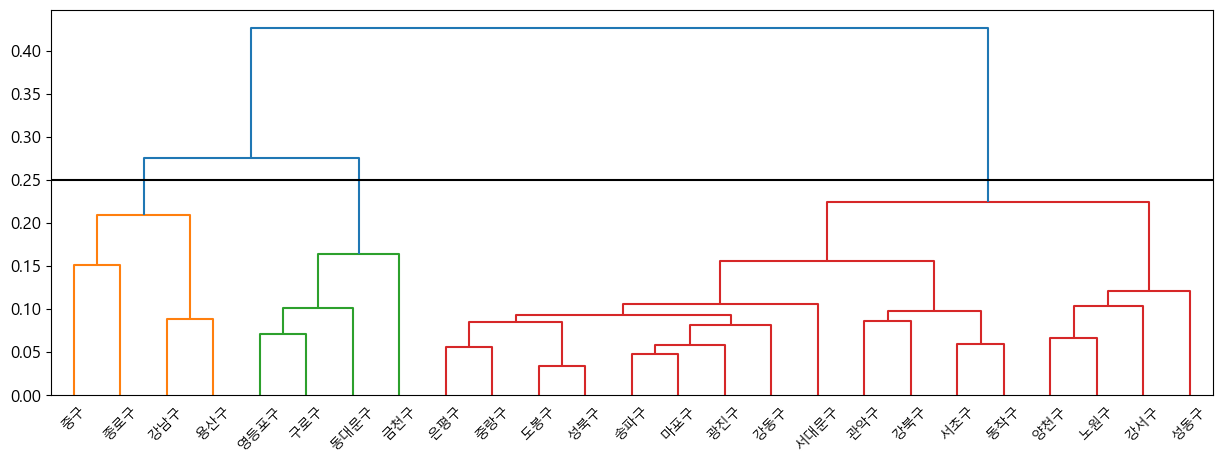

In [55]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

average = linkage(acf_df, method= 'average', metric='euclidean')

labellist = acf_df.index

# 덴드로그램 그리기
dendrogram(average,
           orientation= 'top',
           labels = labellist,
           distance_sort='descending',
           color_threshold= 0.25,
           show_leaf_counts=True)
plt.axhline(y = 0.25, color = 'black')

plt.show()

### 3번
사회과학, 자연과학, 공학 세 개 학과의 평점 조사표를 보고 학과와 성적이 관계있는지 검정하시오.

In [59]:
사회 = [16,30, 12]
자연 = [12, 20, 3]
공학 = [18, 13, 14]

table = pd.DataFrame({'사회과학' : 사회, '자연과학' : 자연, '공학' : 공학}, index = ['3.5~4.5' , '2.5~3.5', '1.5~2.5'])
table

,사회과학,자연과학,공학
3.5~4.5,16,12,18
2.5~3.5,30,20,13
1.5~2.5,12,3,14


#### 3-1 연구가설, 귀무가설을 작성하시오.

+ H0 : 학과와 성적이 독립적이다.
+ H1 : 학과와 성적이 독립이 아니다.

#### 3-2 학과와 성적이 독립일 때 기댓값을 구하시오.

+ 독립성 검정시에는 카이제곱 검정을 수행한다.

In [66]:
from scipy.stats import chi2_contingency
statistic, pvalue, df, expect = chi2_contingency(table)

expect = pd.DataFrame(expect , columns = table.columns, index = table.index)

print('검정통계량 :', statistic)
print('pvalue :', pvalue)
print('자유도 :', df)
print('기댓값 : \n', expect)


검정통계량 : 10.199441509990177
pvalue : 0.03719883770303157
자유도 : 4
기댓값 : 
               사회과학       자연과학         공학
3.5~4.5  19.333333  11.666667  15.000000
2.5~3.5  26.478261  15.978261  20.543478
1.5~2.5  12.188406   7.355072   9.456522


#### 3-3 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

+ 검정 통계량은 10.199이고 pvalue 가 0.05보다 작으므로 귀무가설을 기각한다. 즉 학과와 성적이 독립이 아니다. 관련성이 있다.